In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/kaggle/input/consumers-dataset/consumers.csv')
df = pd.DataFrame(data)
df

,Consumer_ID,City,State,Country,Latitude,Longitude,Smoker,Drink_Level,Transportation_Method,Marital_Status,Children,Age,Occupation,Budget
0,U1001,San Luis Potosi,San Luis Potosi,Mexico,22.139997,-100.978803,No,Abstemious,On Foot,Single,Independent,23,Student,Medium
1,U1002,San Luis Potosi,San Luis Potosi,Mexico,22.150087,-100.983325,No,Abstemious,Public,Single,Independent,22,Student,Low
2,U1003,San Luis Potosi,San Luis Potosi,Mexico,22.119847,-100.946527,No,Social Drinker,Public,Single,Independent,23,Student,Low
3,U1004,Cuernavaca,Morelos,Mexico,18.867000,-99.183000,No,Abstemious,Public,Single,Independent,72,Employed,Medium
4,U1005,San Luis Potosi,San Luis Potosi,Mexico,22.183477,-100.959891,No,Abstemious,Public,Single,Independent,20,Student,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,U1134,San Luis Potosi,San Luis Potosi,Mexico,22.149654,-100.998610,No,Casual Drinker,Public,Single,Independent,21,Student,Medium
134,U1135,San Luis Potosi,San Luis Potosi,Mexico,22.170396,-100.949936,No,Casual Drinker,On Foot,Single,Kids,24,Student,Low
135,U1136,San Luis Potosi,San Luis Potosi,Mexico,22.149607,-100.997235,Yes,Social Drinker,Car,Single,Independent,22,Student,Low
136,U1137,San Luis Potosi,San Luis Potosi,Mexico,22.144803,-100.944623,No,Social Drinker,Public,Single,Independent,23,Student,Low


In [3]:
df.describe(include ="all")

,Consumer_ID,City,State,Country,Latitude,Longitude,Smoker,Drink_Level,Transportation_Method,Marital_Status,Children,Age,Occupation,Budget
count,138,138,138,138,138.000000,138.000000,135,138,131,134,127,138.000000,131,131
unique,138,4,3,1,NaN,NaN,2,3,3,2,3,NaN,3,3
top,U1001,San Luis Potosi,San Luis Potosi,Mexico,NaN,NaN,No,Abstemious,Public,Single,Independent,NaN,Student,Medium
freq,1,86,86,138,NaN,NaN,109,51,82,124,113,NaN,113,91
mean,NaN,NaN,NaN,NaN,21.810389,-100.291857,NaN,NaN,NaN,NaN,NaN,27.297101,NaN,NaN
std,NaN,NaN,NaN,NaN,1.552529,0.869916,NaN,NaN,NaN,NaN,NaN,14.655364,NaN,NaN
min,NaN,NaN,NaN,NaN,18.813348,-101.054680,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,22.126030,-100.983000,NaN,NaN,NaN,NaN,NaN,21.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,22.150497,-100.937788,NaN,NaN,NaN,NaN,NaN,23.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,22.186642,-99.183251,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN


In [4]:
#data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Consumer_ID            138 non-null    object 
 1   City                   138 non-null    object 
 2   State                  138 non-null    object 
 3   Country                138 non-null    object 
 4   Latitude               138 non-null    float64
 5   Longitude              138 non-null    float64
 6   Smoker                 135 non-null    object 
 7   Drink_Level            138 non-null    object 
 8   Transportation_Method  131 non-null    object 
 9   Marital_Status         134 non-null    object 
 10  Children               127 non-null    object 
 11  Age                    138 non-null    int64  
 12  Occupation             131 non-null    object 
 13  Budget                 131 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 15.2+ KB

In [6]:
df.isna().sum()

Consumer_ID               0
City                      0
State                     0
Country                   0
Latitude                  0
Longitude                 0
Smoker                    3
Drink_Level               0
Transportation_Method     7
Marital_Status            4
Children                 11
Age                       0
Occupation                7
Budget                    7
dtype: int64

In [7]:
df[df.Smoker.isna()]

,Consumer_ID,City,State,Country,Latitude,Longitude,Smoker,Drink_Level,Transportation_Method,Marital_Status,Children,Age,Occupation,Budget
23,U1024,San Luis Potosi,San Luis Potosi,Mexico,22.154021,-100.976028,NaN,Abstemious,NaN,NaN,NaN,82,NaN,NaN
121,U1122,San Luis Potosi,San Luis Potosi,Mexico,22.169601,-100.991821,NaN,Abstemious,NaN,NaN,NaN,82,NaN,NaN
129,U1130,Ciudad Victoria,Tamaulipas,Mexico,23.733000,-99.133000,NaN,Abstemious,NaN,NaN,NaN,23,NaN,NaN


In [8]:
df[df.Transportation_Method.isna()]

,Consumer_ID,City,State,Country,Latitude,Longitude,Smoker,Drink_Level,Transportation_Method,Marital_Status,Children,Age,Occupation,Budget
23,U1024,San Luis Potosi,San Luis Potosi,Mexico,22.154021,-100.976028,NaN,Abstemious,NaN,NaN,NaN,82,NaN,NaN
30,U1031,Ciudad Victoria,Tamaulipas,Mexico,23.735698,-99.159851,No,Abstemious,NaN,Married,Kids,20,Unemployed,Medium
38,U1039,Ciudad Victoria,Tamaulipas,Mexico,23.738067,-99.139906,No,Social Drinker,NaN,Single,Independent,23,Student,Medium
82,U1083,San Luis Potosi,San Luis Potosi,Mexico,22.133920,-101.028373,No,Abstemious,NaN,NaN,NaN,31,NaN,NaN
121,U1122,San Luis Potosi,San Luis Potosi,Mexico,22.169601,-100.991821,NaN,Abstemious,NaN,NaN,NaN,82,NaN,NaN
122,U1123,Ciudad Victoria,Tamaulipas,Mexico,23.753112,-99.168567,No,Abstemious,NaN,Single,Independent,25,Student,Medium
129,U1130,Ciudad Victoria,Tamaulipas,Mexico,23.733000,-99.133000,NaN,Abstemious,NaN,NaN,NaN,23,NaN,NaN


In [9]:
df[df.Marital_Status.isna()]

,Consumer_ID,City,State,Country,Latitude,Longitude,Smoker,Drink_Level,Transportation_Method,Marital_Status,Children,Age,Occupation,Budget
23,U1024,San Luis Potosi,San Luis Potosi,Mexico,22.154021,-100.976028,NaN,Abstemious,NaN,NaN,NaN,82,NaN,NaN
82,U1083,San Luis Potosi,San Luis Potosi,Mexico,22.133920,-101.028373,No,Abstemious,NaN,NaN,NaN,31,NaN,NaN
121,U1122,San Luis Potosi,San Luis Potosi,Mexico,22.169601,-100.991821,NaN,Abstemious,NaN,NaN,NaN,82,NaN,NaN
129,U1130,Ciudad Victoria,Tamaulipas,Mexico,23.733000,-99.133000,NaN,Abstemious,NaN,NaN,NaN,23,NaN,NaN


In [10]:
df[df.Children.isna()]

,Consumer_ID,City,State,Country,Latitude,Longitude,Smoker,Drink_Level,Transportation_Method,Marital_Status,Children,Age,Occupation,Budget
16,U1017,Cuernavaca,Morelos,Mexico,18.952615,-99.201616,No,Casual Drinker,Public,Single,NaN,21,Employed,Medium
23,U1024,San Luis Potosi,San Luis Potosi,Mexico,22.154021,-100.976028,NaN,Abstemious,NaN,NaN,NaN,82,NaN,NaN
24,U1025,San Luis Potosi,San Luis Potosi,Mexico,22.125603,-100.907844,No,Social Drinker,Public,Single,NaN,22,Student,Medium
32,U1033,San Luis Potosi,San Luis Potosi,Mexico,22.150000,-100.983000,No,Social Drinker,On Foot,Single,NaN,21,Student,Low
48,U1049,San Luis Potosi,San Luis Potosi,Mexico,22.150000,-100.983000,No,Casual Drinker,Public,Single,NaN,21,Student,NaN
65,U1066,Jiutepec,Morelos,Mexico,18.890695,-99.157104,No,Abstemious,Public,Single,NaN,26,Student,Low
81,U1082,Ciudad Victoria,Tamaulipas,Mexico,23.753061,-99.166095,Yes,Abstemious,Public,Single,NaN,23,Student,Medium
82,U1083,San Luis Potosi,San Luis Potosi,Mexico,22.133920,-101.028373,No,Abstemious,NaN,NaN,NaN,31,NaN,NaN
121,U1122,San Luis Potosi,San Luis Potosi,Mexico,22.169601,-100.991821,NaN,Abstemious,NaN,NaN,NaN,82,NaN,NaN
129,U1130,Ciudad Victoria,Tamaulipas,Mexico,23.733000,-99.133000,NaN,Abstemious,NaN,NaN,NaN,23,NaN,NaN


In [11]:
df[df.Occupation.isna()]

,Consumer_ID,City,State,Country,Latitude,Longitude,Smoker,Drink_Level,Transportation_Method,Marital_Status,Children,Age,Occupation,Budget
23,U1024,San Luis Potosi,San Luis Potosi,Mexico,22.154021,-100.976028,NaN,Abstemious,NaN,NaN,NaN,82,NaN,NaN
78,U1079,Cuernavaca,Morelos,Mexico,18.917000,-99.250000,No,Abstemious,Public,Single,Independent,20,NaN,Medium
82,U1083,San Luis Potosi,San Luis Potosi,Mexico,22.133920,-101.028373,No,Abstemious,NaN,NaN,NaN,31,NaN,NaN
91,U1092,San Luis Potosi,San Luis Potosi,Mexico,22.125365,-100.947888,No,Abstemious,Public,Single,Dependent,22,NaN,Medium
106,U1107,Ciudad Victoria,Tamaulipas,Mexico,23.742409,-99.171889,No,Abstemious,Car,Single,Independent,23,NaN,High
121,U1122,San Luis Potosi,San Luis Potosi,Mexico,22.169601,-100.991821,NaN,Abstemious,NaN,NaN,NaN,82,NaN,NaN
129,U1130,Ciudad Victoria,Tamaulipas,Mexico,23.733000,-99.133000,NaN,Abstemious,NaN,NaN,NaN,23,NaN,NaN


In [12]:
df[df.Budget.isna()]

,Consumer_ID,City,State,Country,Latitude,Longitude,Smoker,Drink_Level,Transportation_Method,Marital_Status,Children,Age,Occupation,Budget
23,U1024,San Luis Potosi,San Luis Potosi,Mexico,22.154021,-100.976028,NaN,Abstemious,NaN,NaN,NaN,82,NaN,NaN
48,U1049,San Luis Potosi,San Luis Potosi,Mexico,22.150000,-100.983000,No,Casual Drinker,Public,Single,NaN,21,Student,NaN
82,U1083,San Luis Potosi,San Luis Potosi,Mexico,22.133920,-101.028373,No,Abstemious,NaN,NaN,NaN,31,NaN,NaN
84,U1085,San Luis Potosi,San Luis Potosi,Mexico,22.196787,-100.936335,No,Abstemious,Car,Single,Independent,24,Student,NaN
121,U1122,San Luis Potosi,San Luis Potosi,Mexico,22.169601,-100.991821,NaN,Abstemious,NaN,NaN,NaN,82,NaN,NaN
129,U1130,Ciudad Victoria,Tamaulipas,Mexico,23.733000,-99.133000,NaN,Abstemious,NaN,NaN,NaN,23,NaN,NaN
131,U1132,San Luis Potosi,San Luis Potosi,Mexico,22.150000,-100.983000,No,Casual Drinker,Public,Single,NaN,21,Student,NaN


In [13]:
df1= df.fillna(method='ffill', axis=1)
df1

,Consumer_ID,City,State,Country,Latitude,Longitude,Smoker,Drink_Level,Transportation_Method,Marital_Status,Children,Age,Occupation,Budget
0,U1001,San Luis Potosi,San Luis Potosi,Mexico,22.139997,-100.978803,No,Abstemious,On Foot,Single,Independent,23,Student,Medium
1,U1002,San Luis Potosi,San Luis Potosi,Mexico,22.150087,-100.983325,No,Abstemious,Public,Single,Independent,22,Student,Low
2,U1003,San Luis Potosi,San Luis Potosi,Mexico,22.119847,-100.946527,No,Social Drinker,Public,Single,Independent,23,Student,Low
3,U1004,Cuernavaca,Morelos,Mexico,18.867,-99.183,No,Abstemious,Public,Single,Independent,72,Employed,Medium
4,U1005,San Luis Potosi,San Luis Potosi,Mexico,22.183477,-100.959891,No,Abstemious,Public,Single,Independent,20,Student,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,U1134,San Luis Potosi,San Luis Potosi,Mexico,22.149654,-100.99861,No,Casual Drinker,Public,Single,Independent,21,Student,Medium
134,U1135,San Luis Potosi,San Luis Potosi,Mexico,22.170396,-100.949936,No,Casual Drinker,On Foot,Single,Kids,24,Student,Low
135,U1136,San Luis Potosi,San Luis Potosi,Mexico,22.149607,-100.997235,Yes,Social Drinker,Car,Single,Independent,22,Student,Low
136,U1137,San Luis Potosi,San Luis Potosi,Mexico,22.144803,-100.944623,No,Social Drinker,Public,Single,Independent,23,Student,Low


In [14]:
df1.isna().sum()

Consumer_ID              0
City                     0
State                    0
Country                  0
Latitude                 0
Longitude                0
Smoker                   0
Drink_Level              0
Transportation_Method    0
Marital_Status           0
Children                 0
Age                      0
Occupation               0
Budget                   0
dtype: int64

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Consumer_ID            138 non-null    object
 1   City                   138 non-null    object
 2   State                  138 non-null    object
 3   Country                138 non-null    object
 4   Latitude               138 non-null    object
 5   Longitude              138 non-null    object
 6   Smoker                 138 non-null    object
 7   Drink_Level            138 non-null    object
 8   Transportation_Method  138 non-null    object
 9   Marital_Status         138 non-null    object
 10  Children               138 non-null    object
 11  Age                    138 non-null    object
 12  Occupation             138 non-null    object
 13  Budget                 138 non-null    object
dtypes: object(14)
memory usage: 15.2+ KB


In [16]:
#Statistical description of data

In [17]:
df1.describe(include ="all")

,Consumer_ID,City,State,Country,Latitude,Longitude,Smoker,Drink_Level,Transportation_Method,Marital_Status,Children,Age,Occupation,Budget
count,138,138,138,138,138.00,138.000,138,138,138,138,138,138,138,138
unique,138,4,3,1,128.00,126.000,5,3,5,3,5,21,8,7
top,U1001,San Luis Potosi,San Luis Potosi,Mexico,22.15,-100.983,No,Abstemious,Public,Single,Independent,23,Student,Medium
freq,1,86,86,138,5.00,5.000,109,51,82,124,113,30,113,91


In [18]:
df2 = df1.dropna()
df2

,Consumer_ID,City,State,Country,Latitude,Longitude,Smoker,Drink_Level,Transportation_Method,Marital_Status,Children,Age,Occupation,Budget
0,U1001,San Luis Potosi,San Luis Potosi,Mexico,22.139997,-100.978803,No,Abstemious,On Foot,Single,Independent,23,Student,Medium
1,U1002,San Luis Potosi,San Luis Potosi,Mexico,22.150087,-100.983325,No,Abstemious,Public,Single,Independent,22,Student,Low
2,U1003,San Luis Potosi,San Luis Potosi,Mexico,22.119847,-100.946527,No,Social Drinker,Public,Single,Independent,23,Student,Low
3,U1004,Cuernavaca,Morelos,Mexico,18.867,-99.183,No,Abstemious,Public,Single,Independent,72,Employed,Medium
4,U1005,San Luis Potosi,San Luis Potosi,Mexico,22.183477,-100.959891,No,Abstemious,Public,Single,Independent,20,Student,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,U1134,San Luis Potosi,San Luis Potosi,Mexico,22.149654,-100.99861,No,Casual Drinker,Public,Single,Independent,21,Student,Medium
134,U1135,San Luis Potosi,San Luis Potosi,Mexico,22.170396,-100.949936,No,Casual Drinker,On Foot,Single,Kids,24,Student,Low
135,U1136,San Luis Potosi,San Luis Potosi,Mexico,22.149607,-100.997235,Yes,Social Drinker,Car,Single,Independent,22,Student,Low
136,U1137,San Luis Potosi,San Luis Potosi,Mexico,22.144803,-100.944623,No,Social Drinker,Public,Single,Independent,23,Student,Low


In [19]:
#chart

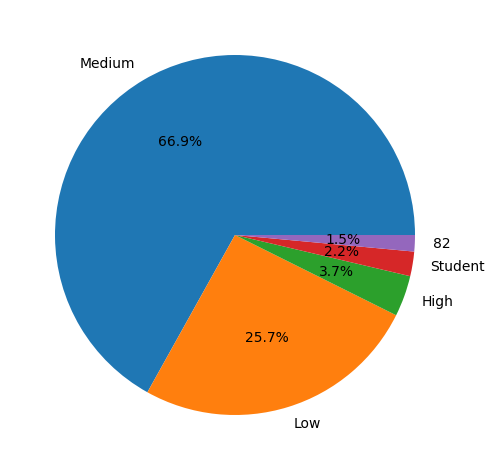

In [20]:
df2 = df1.groupby(pd.Grouper(key = "Budget")).count().reset_index()
df2 = df2.sort_values(by ='Occupation', ascending = False).iloc[:5]
fig, ax = plt.subplots()
ax.pie(df2["Occupation"], labels=df2["Budget"], autopct='%1.1f%%')
plt.tight_layout()

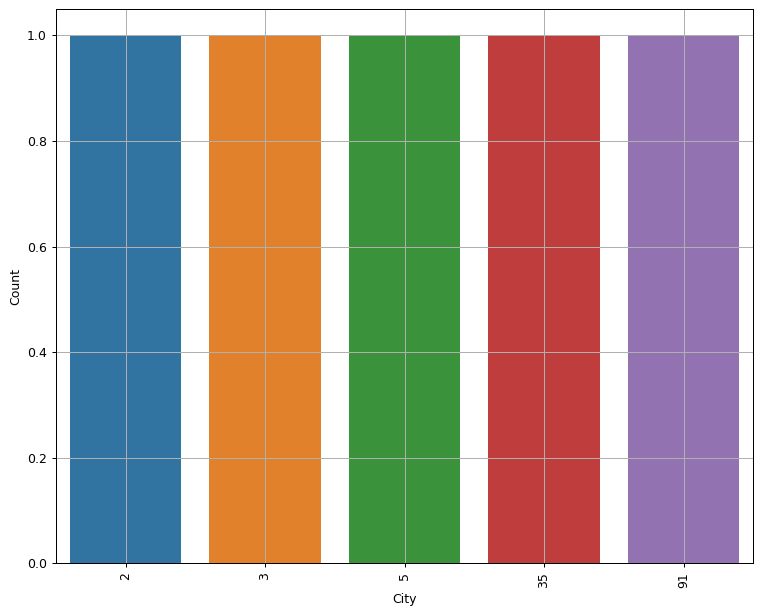

In [21]:
location_counts = df2.groupby('City').size().reset_index(name='Count')
location_counts = location_counts.sort_values('Count', ascending=False)
plt.figure(figsize=(10,8), dpi=90)
sns.barplot(data=location_counts, x='City', y='Count')
plt.xticks(rotation=90)
plt.grid()

In [22]:
fig = px.histogram(df2, x="Age",  template = 'plotly', title = 'Age - Count',
                     text_auto = True,  opacity=0.8)
fig.update_layout(bargap=0.3)
fig.show()

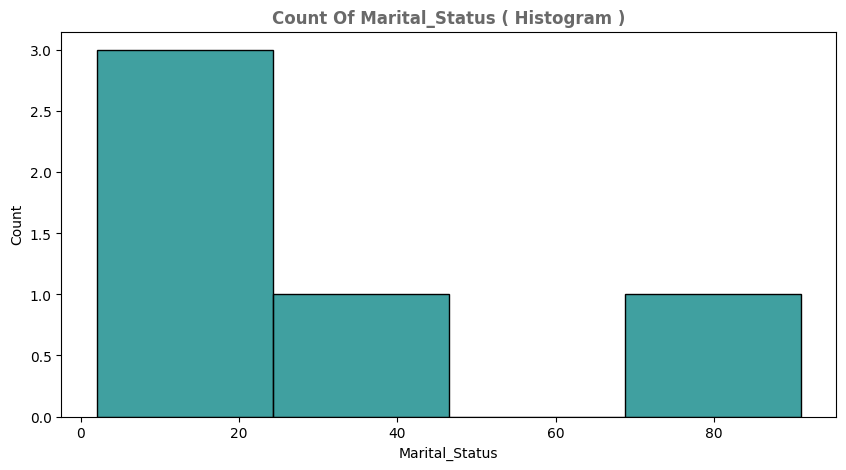

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(data=df2, x='Marital_Status' , color = 'teal')
plt.title('Count Of Marital_Status ( Histogram )', fontweight='bold', color = 'dimgray')
plt.show()

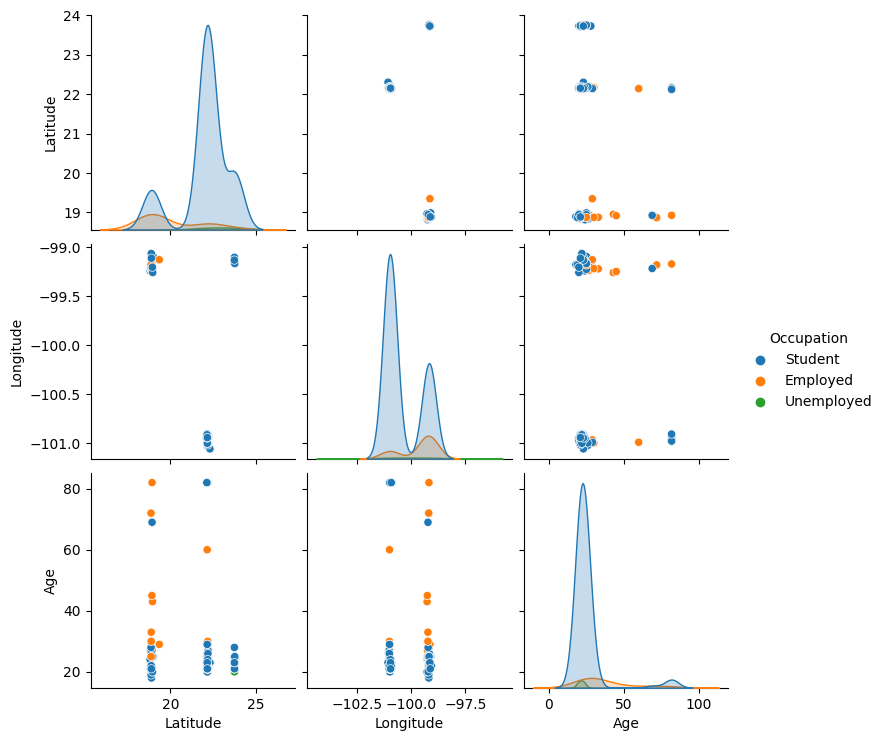

In [24]:
sns.pairplot(data = data, hue= 'Occupation')
plt.show()